In [3]:
# Importing standard Qiskit libraries
from qiskit import *

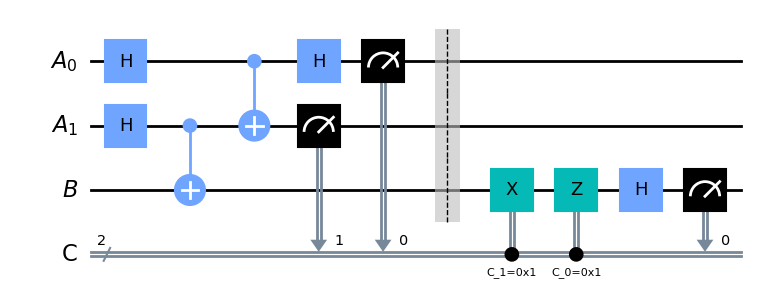

In [6]:
A = QuantumRegister(2,'A')
B = QuantumRegister(1,'B')
C = ClassicalRegister(2,'C')

qc = QuantumCircuit(A,B,C)

#creating entanglement
qc.h(A[1])
qc.cx(A[1],B)

#dummy state A[0]
qc.h(A[0])

#CNT and H by ALICE followed by measiuring
qc.cx(A[0],A[1])
qc.h(A[0])

qc.measure(A[0],C[0])
qc.measure(A[1],C[1])
qc.barrier()

#Bob applies X and Z gate
qc.x(B).c_if(C[1],1)
qc.z(B).c_if(C[0],1)

qc.h(B)
qc.measure(B,C[0])
qc.draw()


In [ ]:
dj_simulator = Aer.get_backend('qasm_simulator')
result = execute(qc,backend=dj_simulator).result()
plot_histogram(result.get_counts(qc))